In [14]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
import pandas as pd
from tensorflow.keras import layers, models
from sklearn.cluster import KMeans

In [2]:
(train_img, train_lab), (test_img, test_lab) = mnist.load_data()

In [11]:
def cluster(cluster_num, data, label, set_size):
    '''
    Use k-means to cluster data and return a set with the given size by random sampling within each cluster
    '''
    # Flatten data for K-means
    data_flattened = data.reshape(data.shape[0], -1)
    
    kmeans = KMeans(n_clusters=cluster_num, random_state=42).fit(data_flattened)
    clusters = kmeans.labels_

    # Create sample by sampling within each cluster
    sample = []
    sample_labels = []

    for idx in range(cluster_num):
        indices = np.where(clusters == idx)[0]
        # Calculate the number of samples to take from each cluster
        cluster_size = len(indices)
        cluster_prop = cluster_size / len(data)
        cluster_samples = int(set_size * cluster_prop)
        
        # Sample indices within the cluster
        sampled_indices = np.random.choice(indices, size=cluster_samples, replace=False)
        
        sample.append(data[sampled_indices])
        sample_labels.append(label[sampled_indices])
        
    # Concatenate all sampled data and labels
    sample = np.concatenate(sample, axis=0)
    sample_labels = np.concatenate(sample_labels, axis=0)

    return sample, sample_labels

In [6]:
def train_test(training_data, training_label, test_data, test_label, train_num):
    loss = []
    test_reshape = test_data.reshape(test_data.shape[0], 28, 28, 1)
    test_normalize = test_reshape.astype('float32') / 255
    
    for i in range(train_num):
        training_data_reshape = training_data.reshape(training_data.shape[0], 28, 28, 1)
        training_data_normalize = training_data_reshape.astype('float32') / 255
        
        model = models.Sequential([
            layers.Conv2D(32, (3, 3), activation='relu'),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(64, (3, 3), activation='relu'),
            layers.Flatten(),
            layers.Dense(64, activation='relu'),
            layers.Dense(10, activation='softmax')
        ])
        
        model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        
        model.fit(training_data_normalize, training_label, epochs=5, batch_size=64)
        test_loss, _ = model.evaluate(test_normalize, test_label)
        loss.append(test_loss)
    
    return loss

In [5]:
set_sizes = [100, 250, 500, 750, 1000, 2000, 3000, 5000, 7000, 10000]

num_samples = 10
num_train = 5

In [7]:
loss_dict = {size: [] for size in set_sizes}

for size in set_sizes:
    print(f"Evaluating set size: {size}")
    
    for i in range(num_samples):        
        # Randomly sample from train_img and train_lab
        sample_indices = np.random.choice(len(train_img), size=size, replace=False)
        sample_img = train_img[sample_indices]
        sample_lab = train_lab[sample_indices]
        
        # Train the model and evaluate on test_img
        losses = train_test(sample_img, sample_lab, test_img, test_lab, num_train)
        
        # Append the losses to the corresponding set size in the dictionary
        loss_dict[size].extend(losses)

Evaluating set size: 100
Epoch 1/5


2024-05-15 15:17:37.414037: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-15 15:17:37.490381: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.0875 - loss: 2.3243 
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4562 - loss: 2.1023 
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5913 - loss: 1.8034 
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6483 - loss: 1.4360 
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7937 - loss: 1.0896 
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6713 - loss: 1.3030
Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2062 - loss: 2.2646  
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3940 - loss: 1.9381 
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6060 - loss: 1.5805 
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6454 - loss: 1.2402 
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6944 - loss: 0.9518 
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5822 - loss: 1.2795
Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 

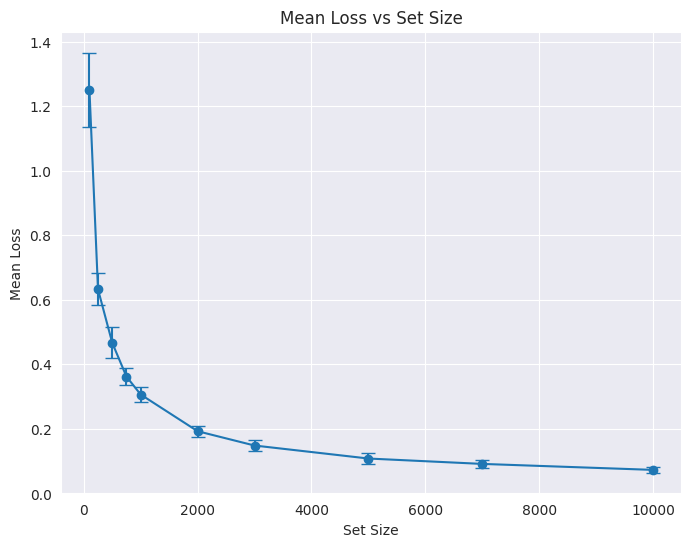

In [21]:
# Calculate the mean loss for each set size
mean_losses_random = [np.mean(loss_dict[size]) for size in set_sizes]
std_losses_random = [np.std(loss_dict[size]) for size in set_sizes]

# Plot the mean loss vs set size
plt.figure(figsize=(8, 6))
plt.errorbar(set_sizes, mean_losses_random, yerr=std_losses_random, fmt='o-', capsize=5)
plt.xlabel('Set Size')
plt.ylabel('Mean Loss')
plt.title('Mean Loss vs Set Size')
plt.grid(True)
plt.show()

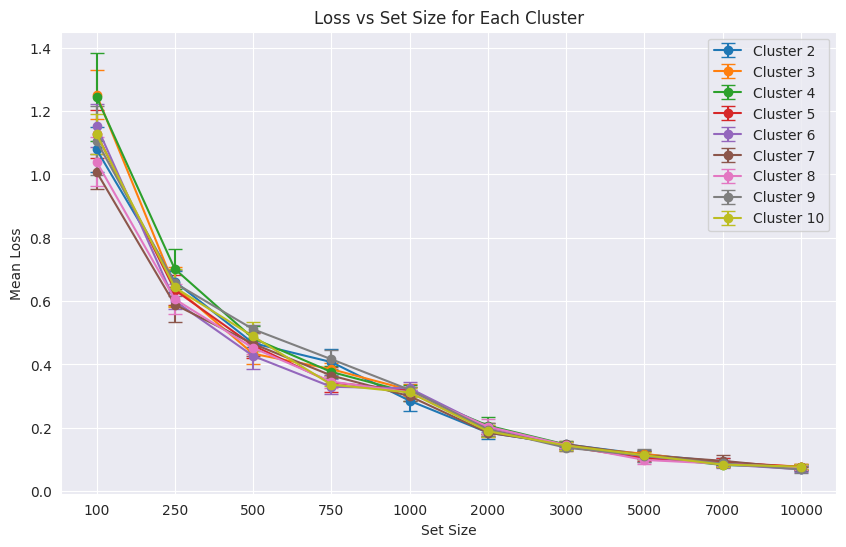

In [20]:
filename = 'losses_summary.csv'
data = pd.read_csv(filename)

# Get the number of clusters and data points
clusters = data['Number of Clusters'].unique()
data_points = data.columns[1:]

# Create a plot
plt.figure(figsize=(10, 6))

# Iterate over each cluster
for cluster in clusters:
    cluster_data = data[data['Number of Clusters'] == cluster]
    mean_losses = []
    std_losses = []
    
    # Extract the mean loss and standard deviation for each data point
    for col in data_points:
        mean_loss, std_loss = cluster_data[col].values[0].split(' ± ')
        mean_losses.append(float(mean_loss))
        std_losses.append(float(std_loss))
    
    # Plot the loss-setsize for the current cluster with error bars
    plt.errorbar(data_points, mean_losses, yerr=std_losses, marker='o', capsize=5, label=f'Cluster {int(cluster)}')

# Add labels and title
plt.xlabel('Set Size')
plt.ylabel('Mean Loss')
plt.title('Loss vs Set Size for Each Cluster')

# Add legend
plt.legend()

# Display the plot
plt.show()

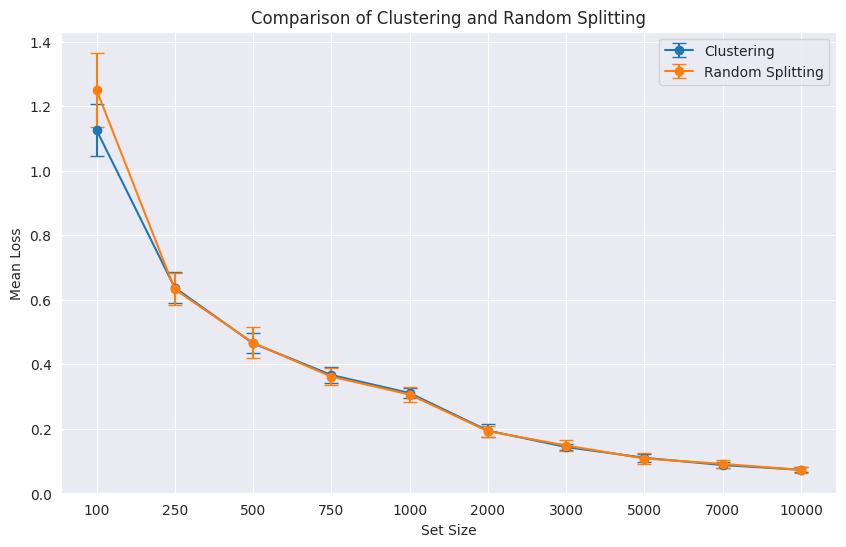

In [22]:
# Calculate the average loss and standard deviation across all clusters for each data point
avg_losses = []
std_losses = []
for col in data_points:
    mean_losses = data[col].apply(lambda x: float(x.split(' ± ')[0]))
    std_devs = data[col].apply(lambda x: float(x.split(' ± ')[1]))
    avg_loss = mean_losses.mean()
    avg_std = std_devs.mean()
    avg_losses.append(avg_loss)
    std_losses.append(avg_std)

plt.figure(figsize=(10, 6))

# Plot the average loss-setsize for clustering with error bars
plt.errorbar(data_points, avg_losses, yerr=std_losses, marker='o', capsize=5, label='Clustering')

# Plot the loss-setsize for random splitting with error bars
plt.errorbar(data_points, mean_losses_random, yerr=std_losses_random, marker='o', capsize=5, label='Random Splitting')


# Add labels and title
plt.xlabel('Set Size')
plt.ylabel('Mean Loss')
plt.title('Comparison of Clustering and Random Splitting')

# Add legend
plt.legend()

# Display the plot
plt.show()

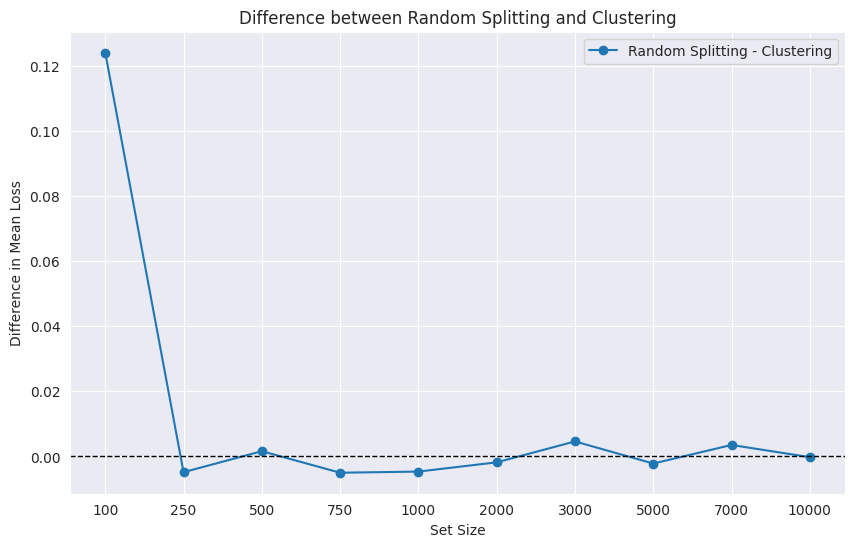

In [23]:
# Calculate the difference between random splitting and clustering losses
diff_losses = [random_loss - cluster_loss for random_loss, cluster_loss in zip(mean_losses_random, avg_losses)]

# Create a plot
plt.figure(figsize=(10, 6))

# Plot the difference in loss-setsize
plt.plot(data_points, diff_losses, marker='o', label='Random Splitting - Clustering')

# Add a horizontal line at y=0
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Add labels and title
plt.xlabel('Set Size')
plt.ylabel('Difference in Mean Loss')
plt.title('Difference between Random Splitting and Clustering')

# Display the plot
plt.show()